In [23]:
from classes import *
from simulationnew import *
import SessionState
from sklearn.manifold import TSNE

# all plot with size = [20,16]
plt.rcParams['figure.figsize'] = [20, 16]

In [24]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
#p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features'] for i in range(0, p_sim['n_features'])]


idx = np.arange( p_sim['n_features'])
beta = (-1) ** idx * np.exp(-idx / 20.)
beta_norm = np.linalg.norm(beta)

p_beta = 1.

p_sim['beta'] = p_beta * beta # / beta_norm


p_sim['alpha'] = 1
p_sim['lamb'] = 1
p_sim['coef_tt'] = 1.8
p_sim['rho'] = 0.1
p_sim['kappa'] = 3.
p_sim['wd_param'] = 10. #4.



p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10


In [25]:
# sin(πXi1Xi2) + 2(Xi3 − 0.5)2 + Xi4 + 0.5Xi5
f1 = lambda x : np.sin(np.pi*x[:,0]*x[:,1] + 2*(x[:,2]-0.5)**2 + x[:,3] + 0.5*x[:,4])

# 2 log(1 + exp(Xi1+Xi2+Xi3 )
f2 = lambda x : np.log(1 + np.exp(x[:,0] + x[:,1] + x[:,2]))

#  (max{Xi1 + Xi2 + Xi3, 0} + max{Xi4 + Xi5, 0}) /2
f3 = lambda x : (np.maximum(x[:,0] + x[:,1] + x[:,2], 0) + np.maximum(x[:,3] + x[:,4], 0)) / 2

#  max{Xi1 + Xi2, Xi3, 0} + max{Xi4 + Xi5, 0}
f4 = lambda x : (np.maximum(x[:,0] + x[:,1], 0) - np.maximum(x[:,3] + x[:,4], 0))


p_sim['scheme'] =Scheme('nonlinear',f4) # Scheme('nonlinear', f1)


In [27]:
p_survcaus, p_sim 

({'num_durations': 25,
  'encoded_features': 20,
  'alpha_wass': 1,
  'batch_size': 256,
  'epochs': 100,
  'lr': 0.01,
  'patience': 10},
 {'n_samples': 1000,
  'n_features': 25,
  'beta': array([ 1.        , -0.95122942,  0.90483742, -0.86070798,  0.81873075,
         -0.77880078,  0.74081822, -0.70468809,  0.67032005, -0.63762815,
          0.60653066, -0.57694981,  0.54881164, -0.52204578,  0.4965853 ,
         -0.47236655,  0.44932896, -0.42741493,  0.40656966, -0.38674102,
          0.36787944, -0.34993775,  0.33287108, -0.31663677,  0.30119421]),
  'alpha': 1,
  'lamb': 1,
  'coef_tt': 1.8,
  'rho': 0.1,
  'kappa': 3.0,
  'wd_param': 10.0,
  'path_data': './sim_surv',
  'scheme': <simulationnew.Scheme at 0x7fb24f473f70>})

In [26]:
simu = SimulationNew(p_sim)
data = simu.simulation_surv()

WD =  694.4804077148438
tt = 1 : 50 % 
event = 1 : 92 %
Scheme :  nonlinear


In [6]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.070877,-0.058838,-0.140196,-0.094547,-0.082327,-0.129664,-0.103190,-0.082232,-0.097970,-0.098284,...,-0.139259,-0.130768,0.511000,0.607180,0.749000,0.542258,1.015135,0.803817,0.753577,-0.021886
std,4.878238,5.317300,4.851825,5.251577,4.954069,5.253628,4.967174,5.184152,5.036850,5.219673,...,5.166400,5.073024,0.500129,0.545721,0.433805,0.399371,0.768986,0.805912,0.460432,0.918092
min,-7.770052,-8.005683,-7.326101,-7.422804,-7.818034,-8.151727,-7.596645,-7.828802,-7.882413,-7.992263,...,-8.025982,-7.411733,0.000000,0.002732,0.000000,0.034393,0.051681,0.051681,0.034393,-2.875822
25%,-4.811622,-5.199983,-4.819635,-5.140010,-4.871359,-5.221717,-4.913846,-5.086031,-4.922230,-5.111500,...,-5.132108,-4.989786,0.000000,0.307291,0.000000,0.303439,0.554098,0.378198,0.410234,-0.608243
50%,-2.683219,-3.187482,-2.861210,-3.091880,-2.787333,-3.186820,-2.858987,-3.008003,-2.913105,-3.103933,...,-3.125279,-2.910218,1.000000,0.476286,1.000000,0.463898,0.857795,0.559401,0.706015,-0.045734
75%,4.754664,5.239674,4.721217,5.080785,4.852193,5.176630,4.869094,5.119425,4.856169,5.124401,...,4.944617,4.905879,1.000000,0.683212,1.000000,0.643831,1.212840,0.809177,1.020938,0.627488
max,7.691093,7.857398,7.905886,9.289353,7.472818,8.621156,7.650676,7.855132,7.542710,8.027616,...,8.988194,8.253114,1.000000,5.326751,1.000000,4.202832,7.242916,7.242916,4.202832,2.847203


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.811275
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.547775


2021-11-17 07:06:27.426 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-17 07:06:27.426 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


[t-SNE] KL divergence after 1000 iterations: 1.957227


<ipython-input-7-6badf8fd86fe>:15: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



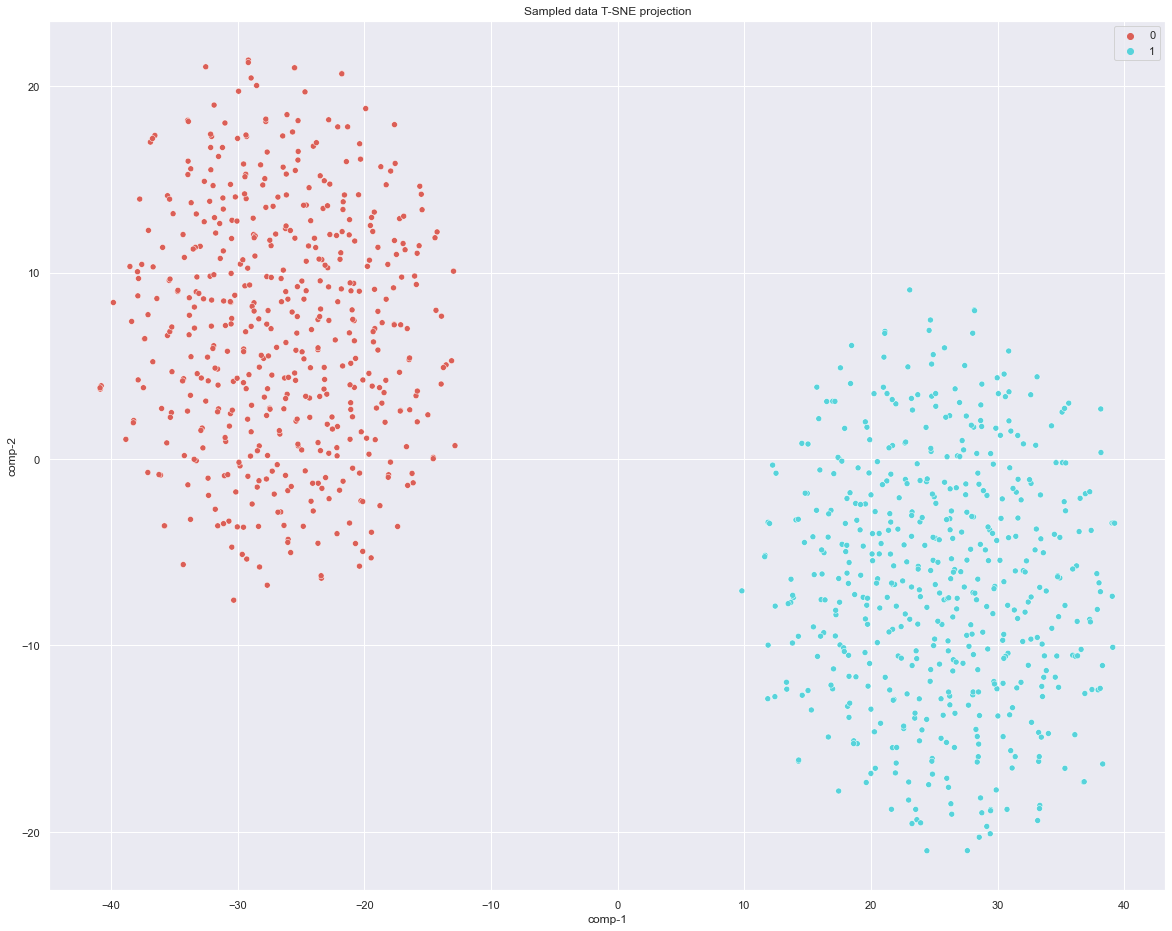

In [7]:
# TSNE

x = data.iloc[:, :p_sim['n_features']]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
d = pd.DataFrame()
d["tt"] = data[['tt']].values.squeeze()
d["comp-1"] = z[:, 0]
d["comp-2"] = z[:, 1]

fig = plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
            palette=sns.color_palette("hls", 2),
            data=d).set(title="Sampled data T-SNE projection")
fig.show()


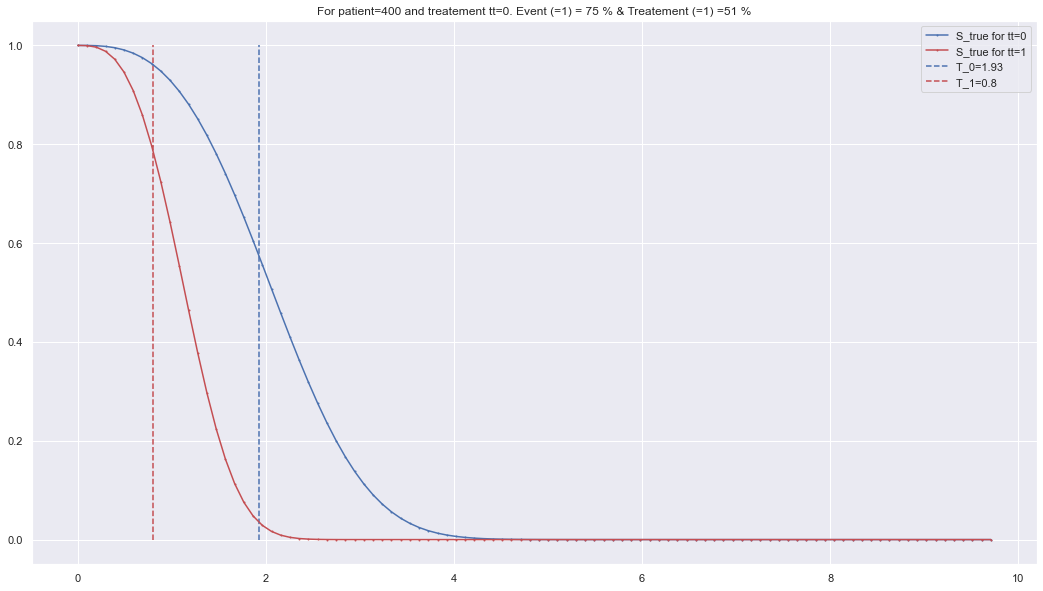

In [20]:
simu.plot_surv_true(patient=400)

# Tunning

In [9]:
#Tunning Survcaus 


tunning = Tunning(p_sim)
n_trials = 1
   
    
p_survcaus_best = tunning.get_best_hyperparameter_survcaus(n_trials=n_trials)


[I 2021-11-17 07:06:28,018] A new study created in memory with name: no-name-d2776c61-bfee-4cd3-93c2-e138a11523dd


0:	[0s / 0s],		train_loss: 3.1999,	train_loss_surv: 3.1625,	train_loss_wass: 0.0085,	val_loss: 3.2613,	val_loss_surv: 3.2322,	val_loss_wass: 0.0066
1:	[0s / 0s],		train_loss: 3.1459,	train_loss_surv: 3.1105,	train_loss_wass: 0.0080,	val_loss: 3.2609,	val_loss_surv: 3.2334,	val_loss_wass: 0.0062
2:	[0s / 0s],		train_loss: 3.2035,	train_loss_surv: 3.1701,	train_loss_wass: 0.0076,	val_loss: 3.2610,	val_loss_surv: 3.2347,	val_loss_wass: 0.0060
3:	[0s / 1s],		train_loss: 3.1206,	train_loss_surv: 3.0878,	train_loss_wass: 0.0074,	val_loss: 3.2615,	val_loss_surv: 3.2363,	val_loss_wass: 0.0057
4:	[0s / 1s],		train_loss: 3.1171,	train_loss_surv: 3.0847,	train_loss_wass: 0.0073,	val_loss: 3.2621,	val_loss_surv: 3.2379,	val_loss_wass: 0.0055


 44%|████▍     | 88/200 [00:00<00:00, 874.75it/s]

5:	[0s / 1s],		train_loss: 3.1135,	train_loss_surv: 3.0856,	train_loss_wass: 0.0063,	val_loss: 3.2630,	val_loss_surv: 3.2397,	val_loss_wass: 0.0053


100%|██████████| 200/200 [00:00<00:00, 929.79it/s]
[I 2021-11-17 07:06:30,462] Trial 0 finished with value: 0.06308207034538034 and parameters: {'num_durations': 54, 'encoded_features': 67, 'alpha_wass': 4.420774143588174, 'lr': 0.00014986641043275353, 'patience': 4}. Best is trial 0 with value: 0.06308207034538034.


In [10]:
# Tunning BART 

p_bart_best = tunning.get_best_hyperparameter_bart(n_trials=n_trials)
            

[I 2021-11-17 07:06:30,479] A new study created in memory with name: no-name-4d375fdc-cdf7-4ac5-b8c1-07a18d27db3b
100%|██████████| 200/200 [00:02<00:00, 85.55it/s] 
[I 2021-11-17 07:06:33,439] Trial 0 finished with value: 0.056804766656460434 and parameters: {'num_trees': 30, 'max_features': 'log2', 'max_depth': 6, 'alpha': 0.1757604658180789}. Best is trial 0 with value: 0.056804766656460434.


# Training 

In [11]:

p_survcaus = p_survcaus_best.copy()

p_survcaus['patience'] = 2
p_survcaus['epochs'] = 40
p_survcaus['batch_size'] = 256

    
print("Best hyperparameter for survcaus : ", p_survcaus_best)
print("Best hyperparameter for BART : ", p_bart_best)
    
Ev = Evaluation(p_sim, p_survcaus)


list_models =  ["SurvCaus", "SurvCaus_0", 'CoxPH', 'BART']
print("Choosed models : ", list_models)



Best hyperparameter for survcaus :  {'num_durations': 54, 'encoded_features': 67, 'alpha_wass': 4.420774143588174, 'lr': 0.00014986641043275353, 'patience': 4}
Best hyperparameter for BART :  {'num_trees': 30, 'max_features': 'log2', 'max_depth': 6, 'alpha': 0.1757604658180789}
Choosed models :  ['SurvCaus', 'SurvCaus_0', 'CoxPH', 'BART']


SurvCaus
{'num_durations': 54, 'encoded_features': 67, 'alpha_wass': 4.420774143588174, 'lr': 0.00014986641043275353, 'patience': 2, 'epochs': 40, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 3.1286,	train_loss_surv: 3.0614,	train_loss_wass: 0.0152,	val_loss: 3.2163,	val_loss_surv: 3.1694,	val_loss_wass: 0.0106
1:	[0s / 1s],		train_loss: 3.2340,	train_loss_surv: 3.1752,	train_loss_wass: 0.0133,	val_loss: 3.2111,	val_loss_surv: 3.1691,	val_loss_wass: 0.0095
2:	[0s / 1s],		train_loss: 3.2095,	train_loss_surv: 3.1557,	train_loss_wass: 0.0122,	val_loss: 3.2077,	val_loss_surv: 3.1696,	val_loss_wass: 0.0086
3:	[0s / 2s],		train_loss: 3.1964,	train_loss_surv: 3.1453,	train_loss_wass: 0.0115,	val_loss: 3.2053,	val_loss_surv: 3.1703,	val_loss_wass: 0.0079
4:	[0s / 2s],		train_loss: 3.1339,	train_loss_surv: 3.0874,	train_loss_wass: 0.0105,	val_loss: 3.2038,	val_loss_surv: 3.1712,	val_loss_wass: 0.0074
5:	[0s / 2s],		train_loss: 3.0778,	train_loss_surv: 3.0346,	train_loss_wass: 0.0098,	val_loss:

 42%|████▏     | 83/200 [00:00<00:00, 826.49it/s]

38:	[0s / 13s],		train_loss: 2.8804,	train_loss_surv: 2.8657,	train_loss_wass: 0.0033,	val_loss: 3.1546,	val_loss_surv: 3.1443,	val_loss_wass: 0.0023


100%|██████████| 200/200 [00:00<00:00, 852.88it/s]


SurvCaus_0
{'num_durations': 54, 'encoded_features': 67, 'alpha_wass': 0.0, 'lr': 0.00014986641043275353, 'patience': 2, 'epochs': 40, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 3.1383,	train_loss_surv: 3.1383,	train_loss_wass: 0.0049,	val_loss: 3.2728,	val_loss_surv: 3.2728,	val_loss_wass: 0.0039
1:	[0s / 0s],		train_loss: 3.1248,	train_loss_surv: 3.1248,	train_loss_wass: 0.0044,	val_loss: 3.2730,	val_loss_surv: 3.2730,	val_loss_wass: 0.0039


 30%|███       | 61/200 [00:00<00:00, 609.84it/s]

2:	[0s / 1s],		train_loss: 3.1024,	train_loss_surv: 3.1024,	train_loss_wass: 0.0052,	val_loss: 3.2729,	val_loss_surv: 3.2729,	val_loss_wass: 0.0039


100%|██████████| 200/200 [00:00<00:00, 586.08it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 965.629 - ||grad||^2 = 275.69390
 * Iteration #2 - Loss = 916.849 - ||grad||^2 = 246.65700
 * Iteration #3 - Loss = 881.342 - ||grad||^2 = 221.24830
 * Iteration #4 - Loss = 854.173 - ||grad||^2 = 198.76046
 * Iteration #5 - Loss = 832.757 - ||grad||^2 = 178.73424
 * Iteration #6 - Loss = 815.554 - ||grad||^2 = 160.83208
 * Iteration #7 - Loss = 801.568 - ||grad||^2 = 144.78836
 * Iteration #8 - Loss = 790.107 - ||grad||^2 = 130.38523
 * Iteration #9 - Loss = 780.668 - ||grad||^2 = 117.43913
 * Iteration #10 - Loss = 772.872 - ||grad||^2 = 105.79255
 * Iteration #11 - Loss = 766.421 - ||grad||^2 = 95.30854
 * Iteration #12 - Loss = 761.079 - ||grad||^2 = 85.86689
 * Iteration #13 - Loss = 756.654 - ||grad||^2 = 77.36138
 * Iteration #14 - Loss = 752.990 - ||grad||^2 = 69.69761
 * Iteration #15 - Loss = 749.958 - ||grad||^2 = 62.79138
 * Iteration #16 - Loss = 747.451 - ||grad||^2 = 56.56737
 * Iteration #17 - Loss = 

  0%|          | 0/200 [00:00<?, ?it/s]

 * Iteration #97 - Loss = 1147.724 - ||grad||^2 = 0.01216
 * Iteration #98 - Loss = 1147.724 - ||grad||^2 = 0.01094
 * Iteration #99 - Loss = 1147.724 - ||grad||^2 = 0.00985
Converged after 99 iterations.


2021-11-17 07:07:01.770 INFO    numba.core.transforms: finding looplift candidates
100%|██████████| 200/200 [00:02<00:00, 94.62it/s] 


BART


100%|██████████| 200/200 [00:00<00:00, 579.73it/s]


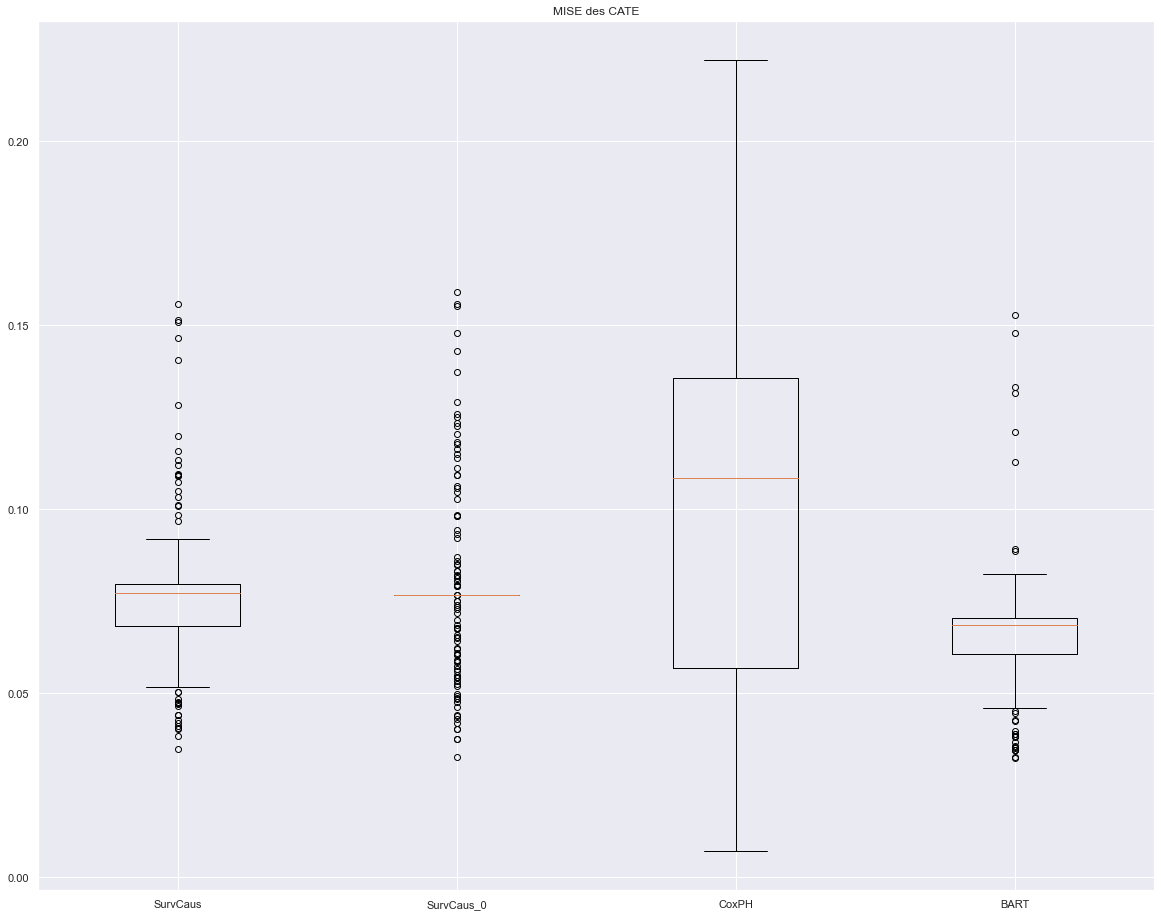

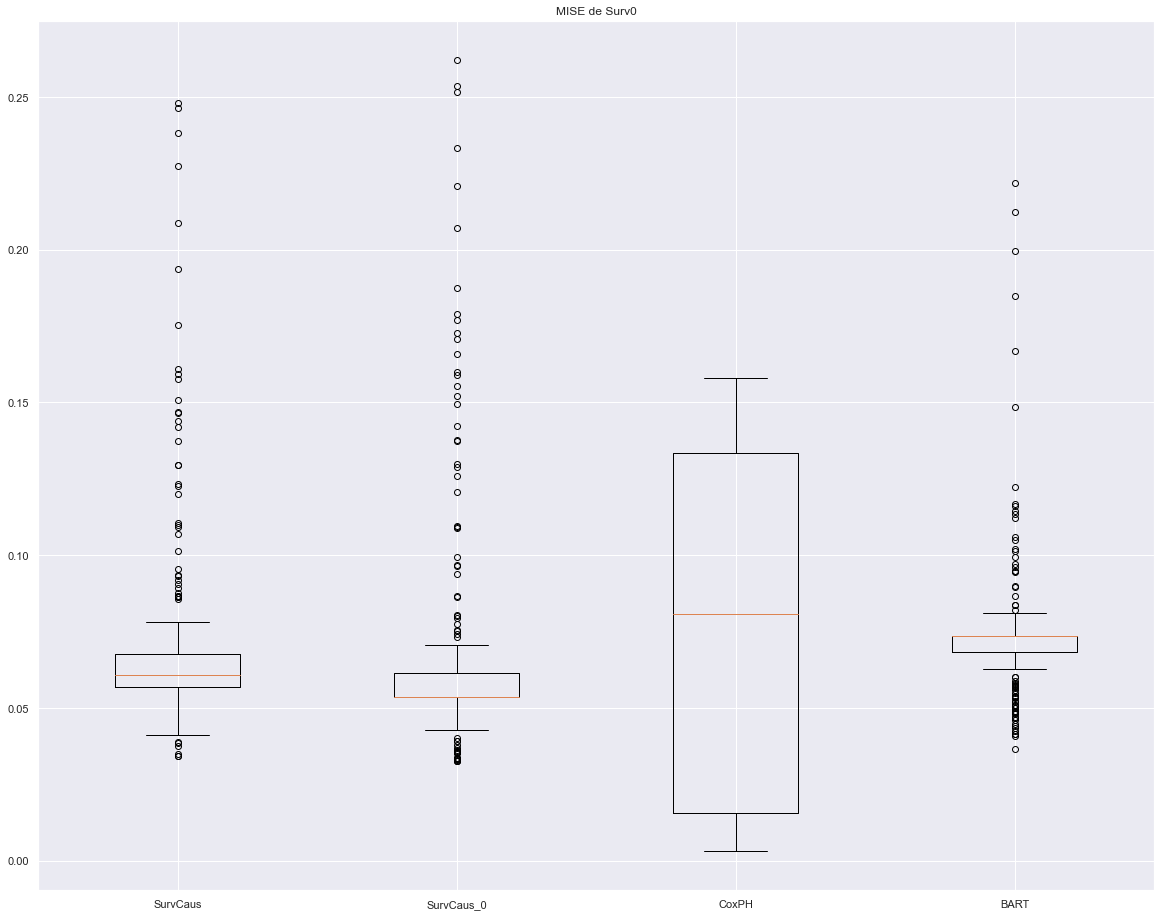

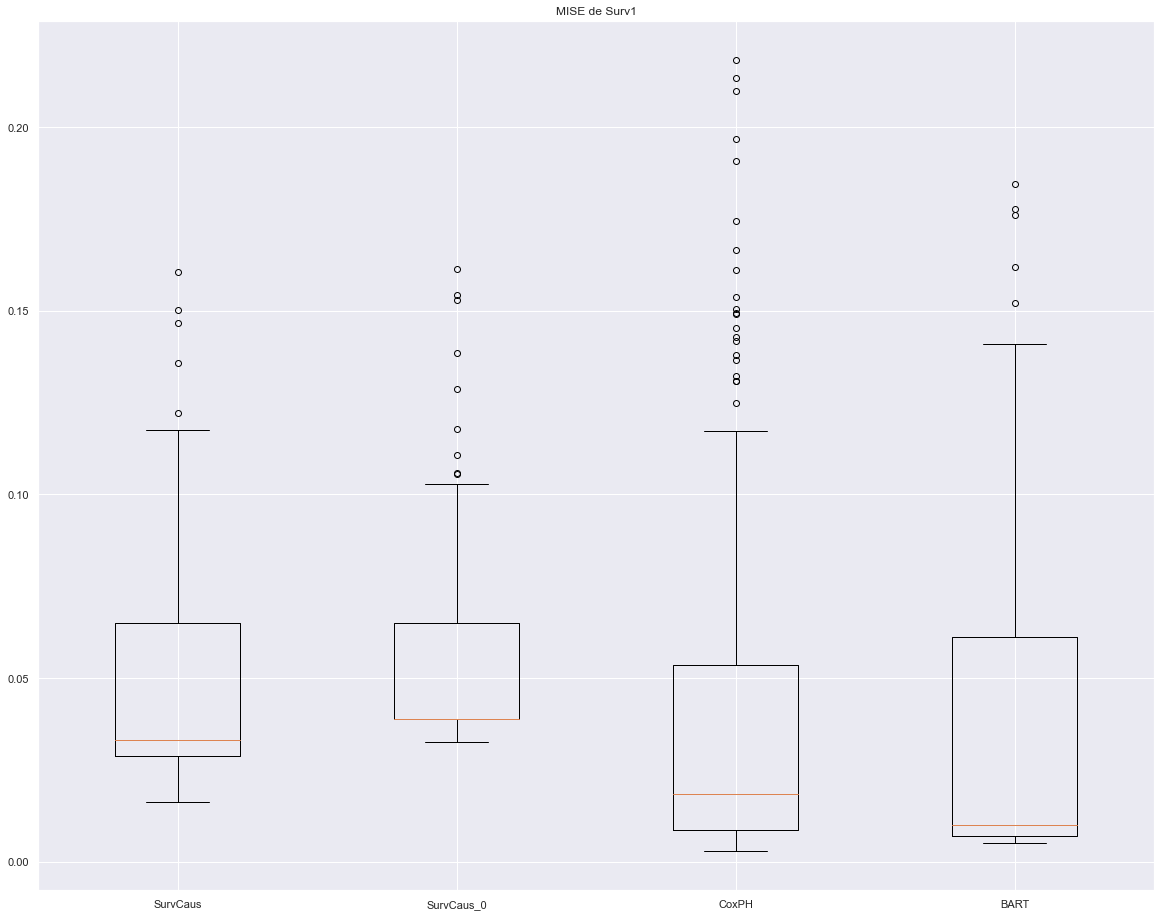

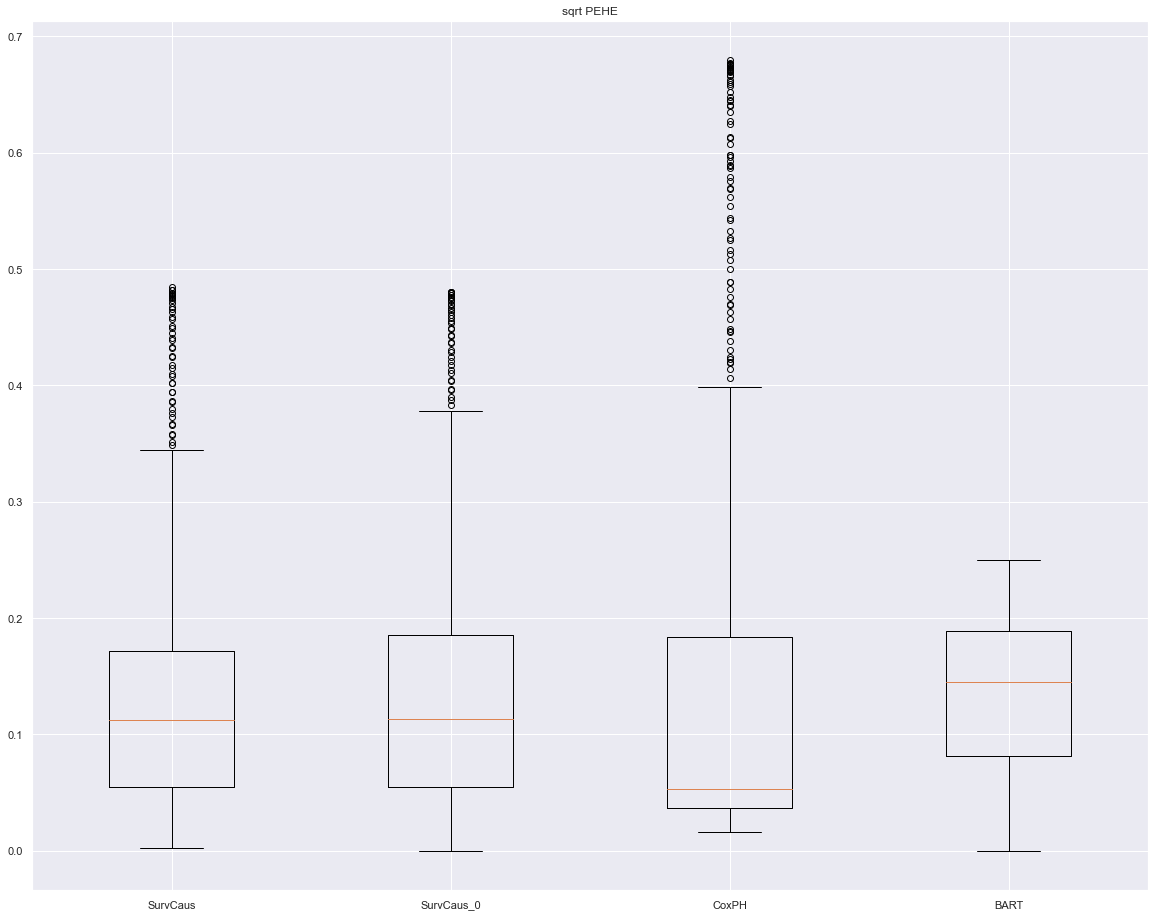

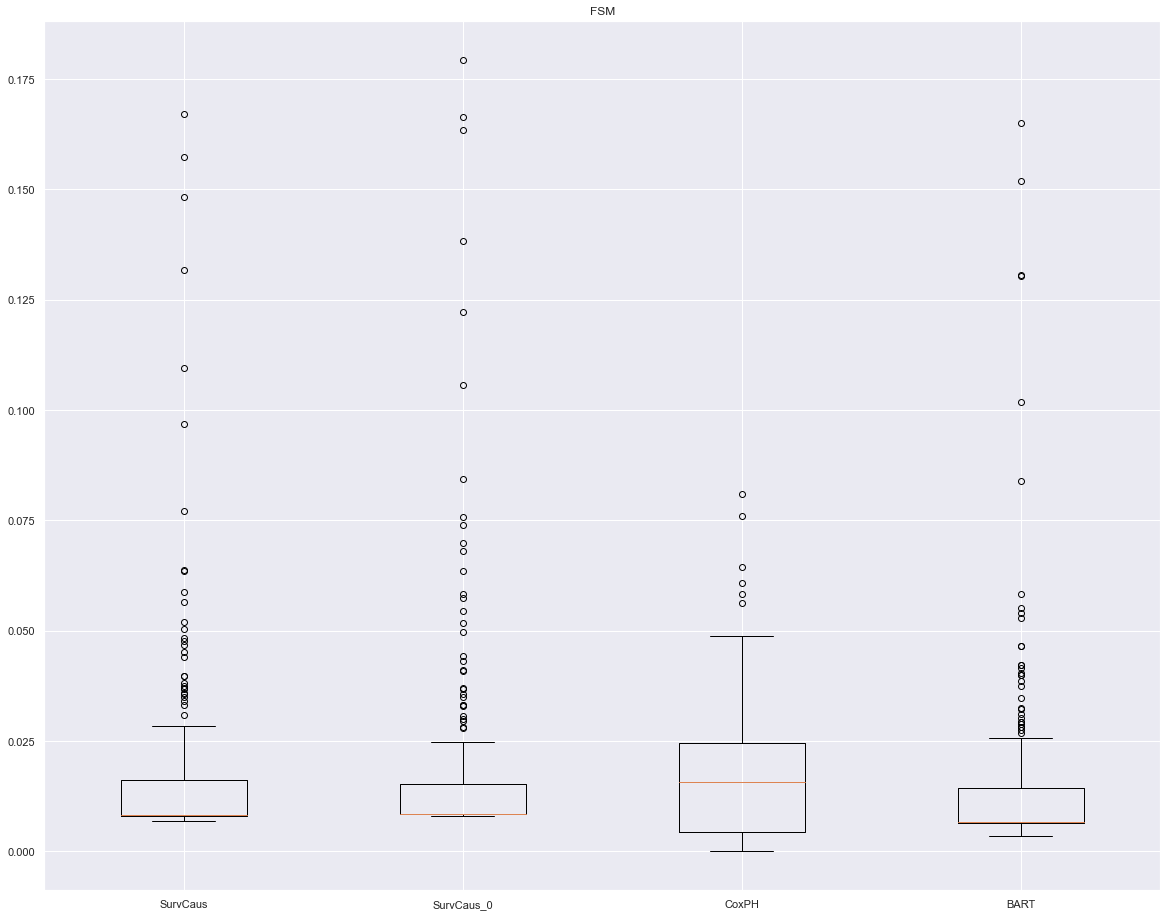

In [12]:
Ev.All_Results(list_models=list_models,
                        is_train=False,params_bart=p_bart_best)

# Benchmark

In [13]:

# Bilan of benchmark
Ev.bilan_benchmark


,models,Mise0,Mise1,CATE,PEHE,FSM
0,SurvCaus,"(0.073, 0.037)","(0.048, 0.029)","(0.076, 0.019)","(0.14, 0.115)","(0.018, 0.025)"
1,SurvCaus_0,"(0.069, 0.043)","(0.054, 0.026)","(0.078, 0.021)","(0.145, 0.119)","(0.019, 0.027)"
2,CoxPH,"(0.075, 0.057)","(0.04, 0.049)","(0.098, 0.048)","(0.156, 0.197)","(0.017, 0.014)"
3,BART,"(0.075, 0.025)","(0.036, 0.04)","(0.066, 0.016)","(0.144, 0.061)","(0.016, 0.023)"


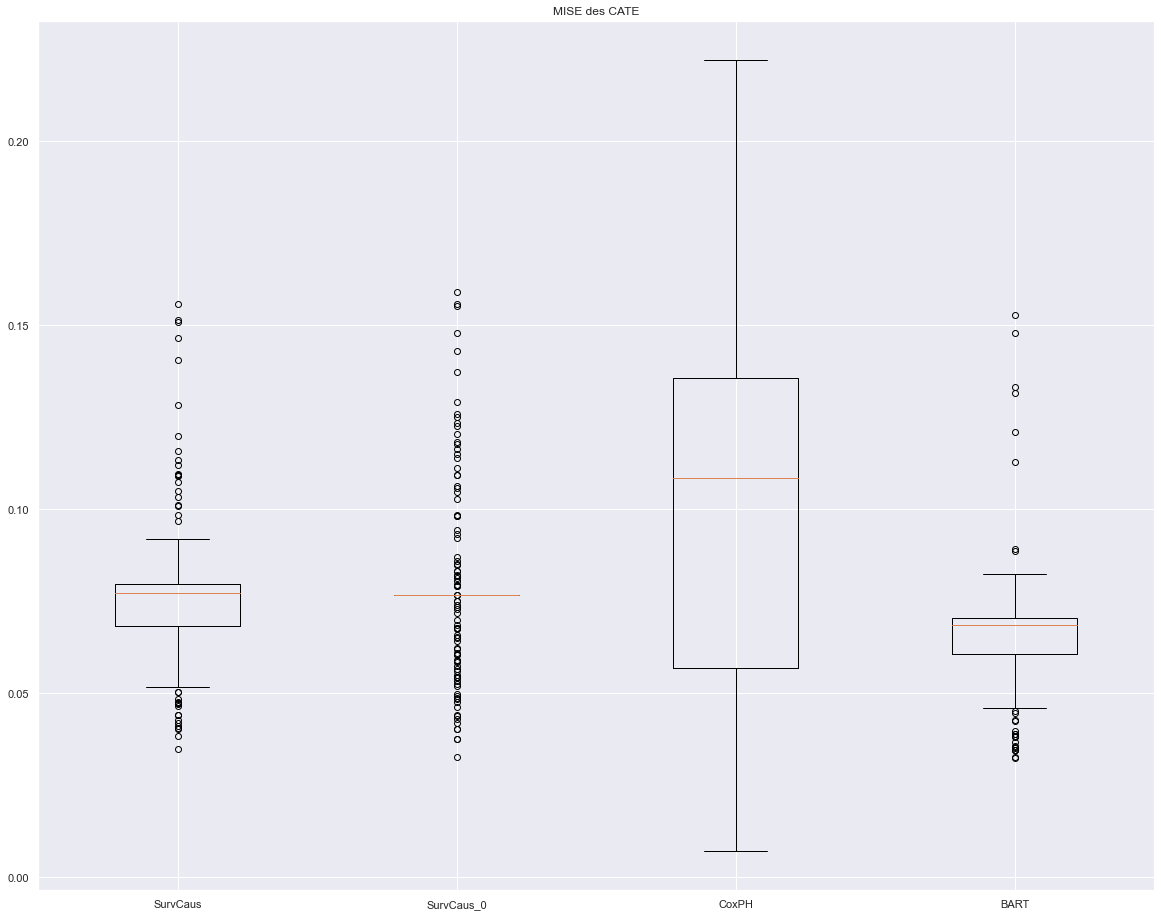

In [14]:
Ev.box_plot_cate

    


modifier S,
experiment
log - neptune
tables 
lancer :  wd, lin/nonlin, 
pas oublier brca !! 


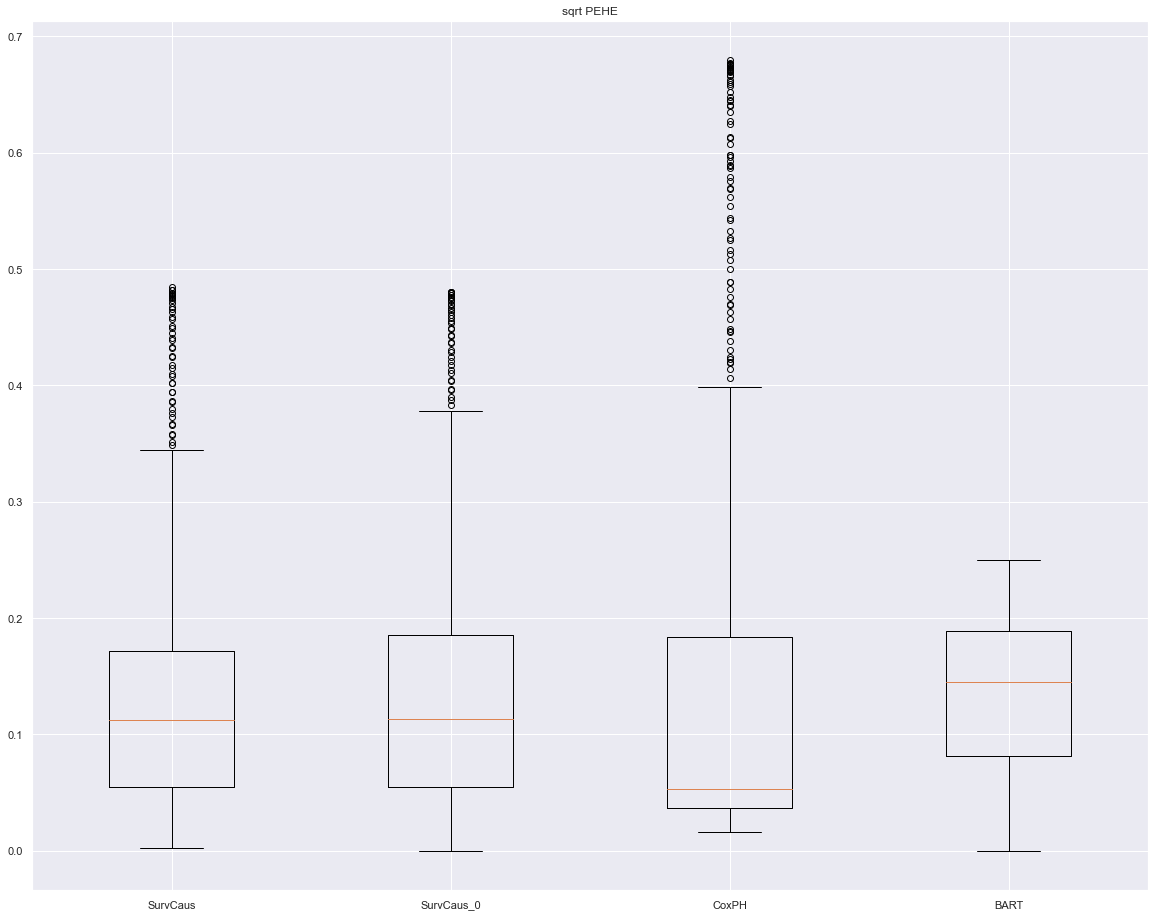

In [15]:
Ev.box_plot_pehe

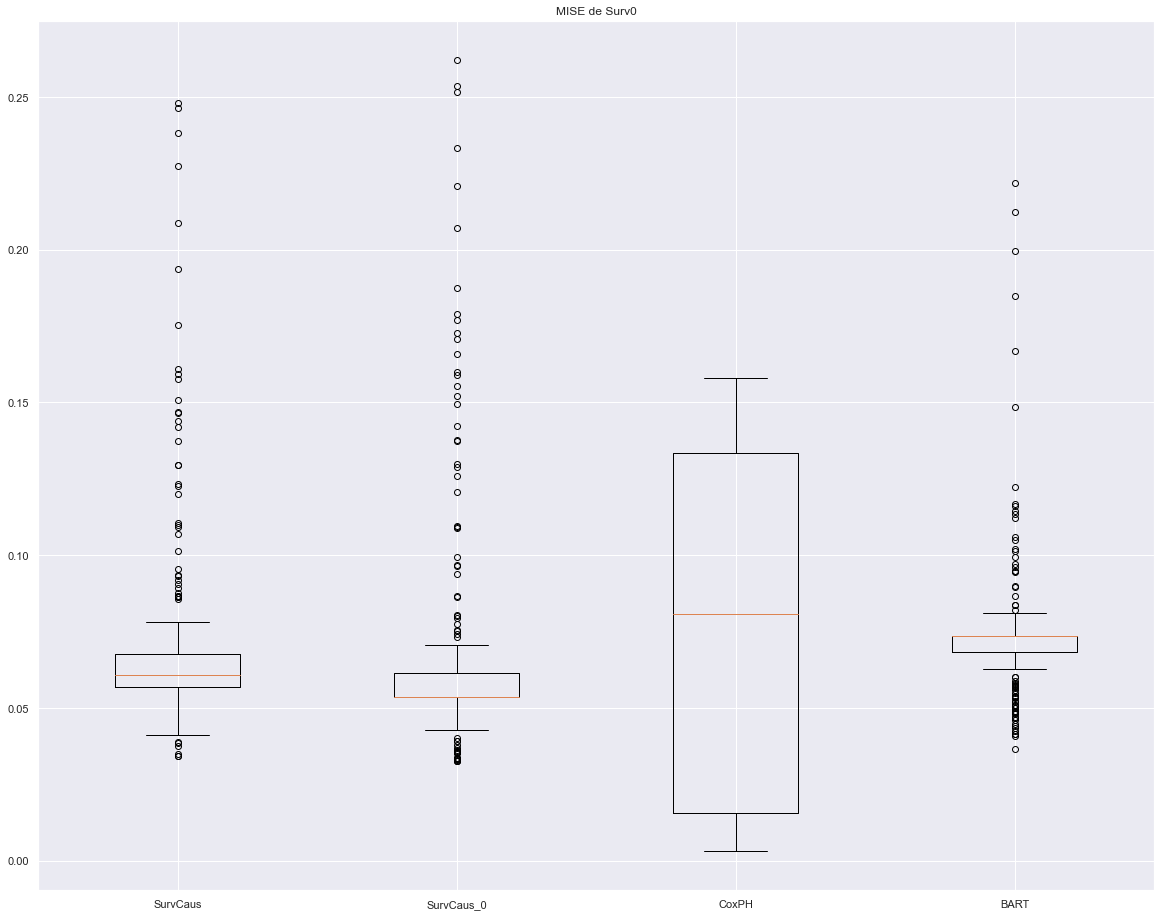

In [16]:
Ev.box_plot_surv0

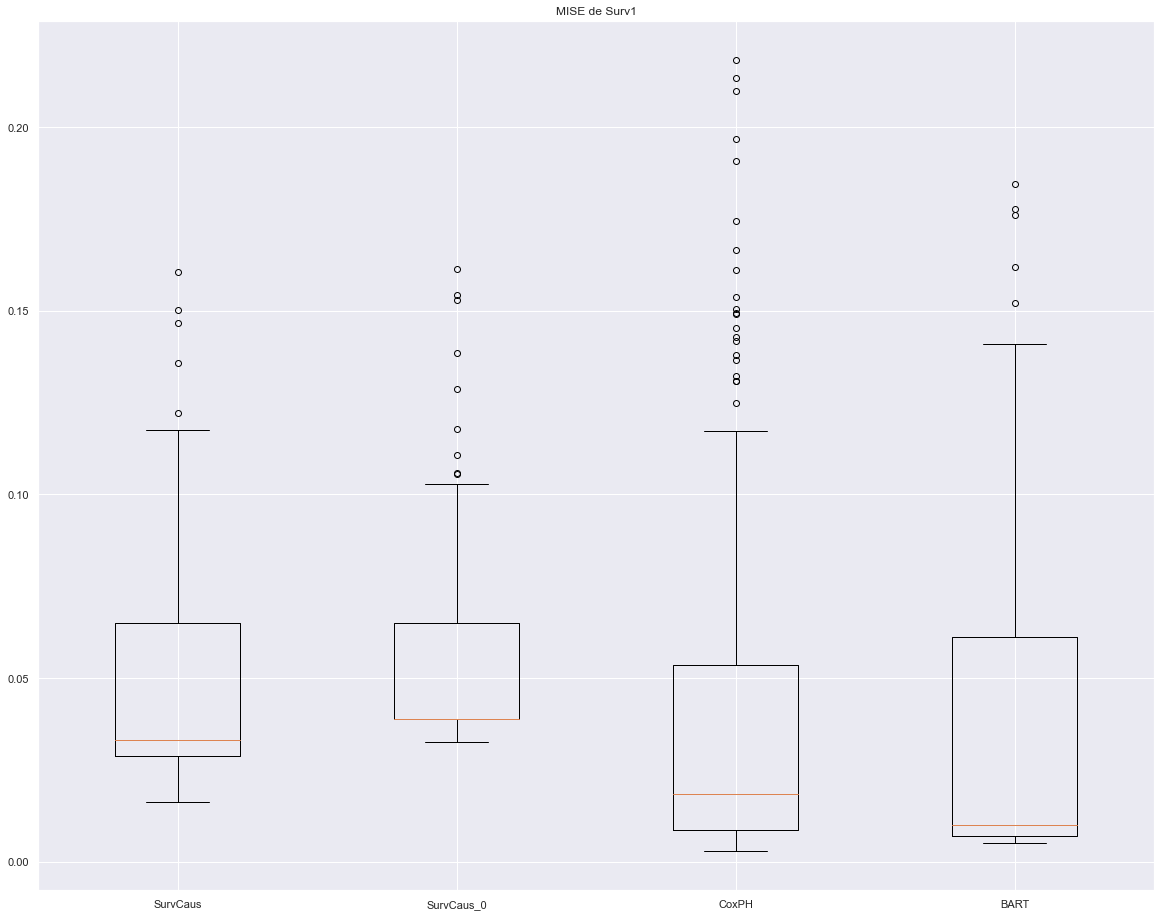

In [17]:
Ev.box_plot_surv1

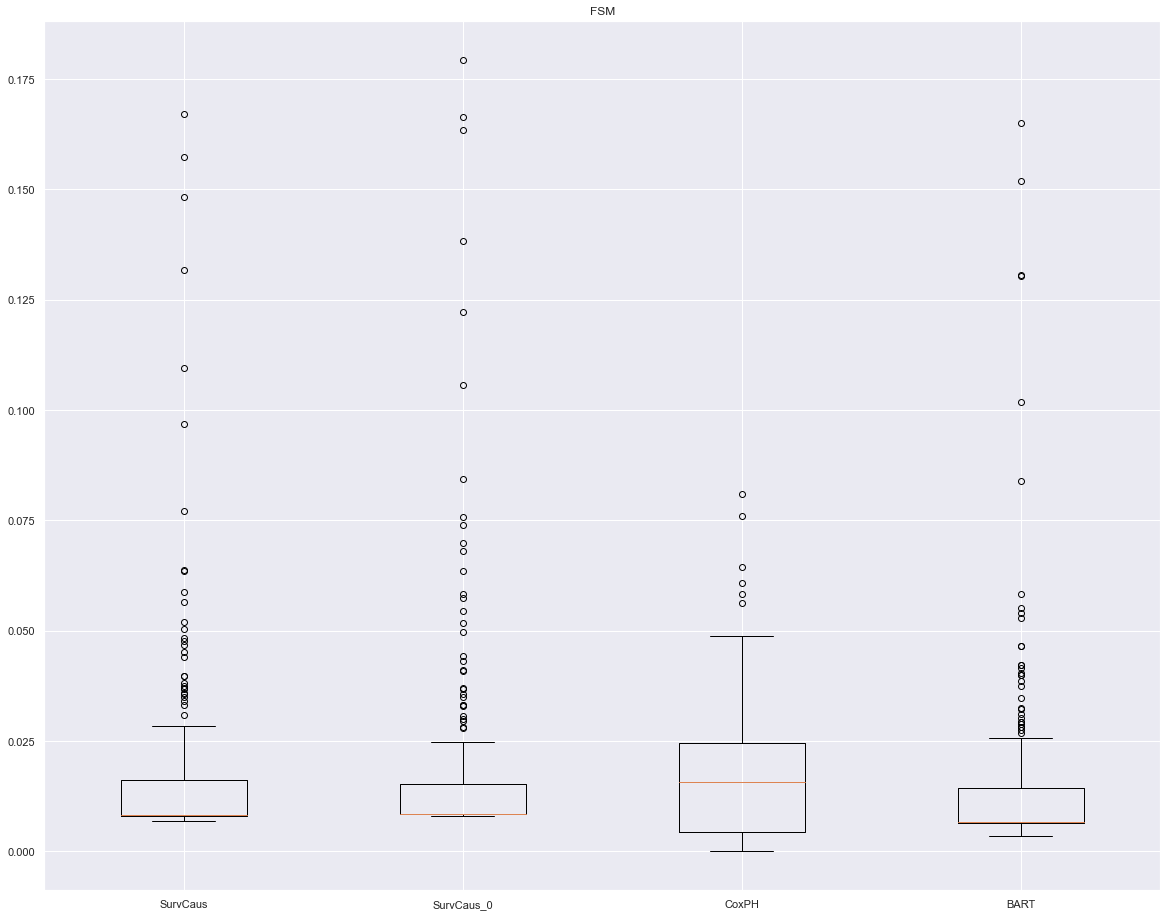

In [18]:
Ev.box_plot_FSM

(p_ours,p_bench) = (20, 138)
(p_ours,p_bench) = (20, 116)
(p_ours,p_bench) = (20, 174)


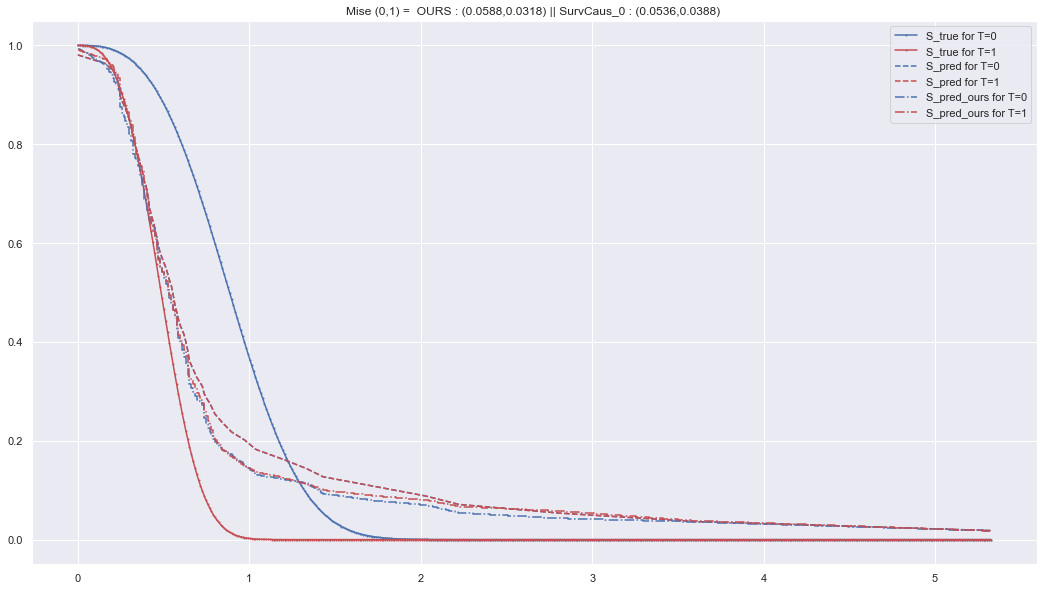

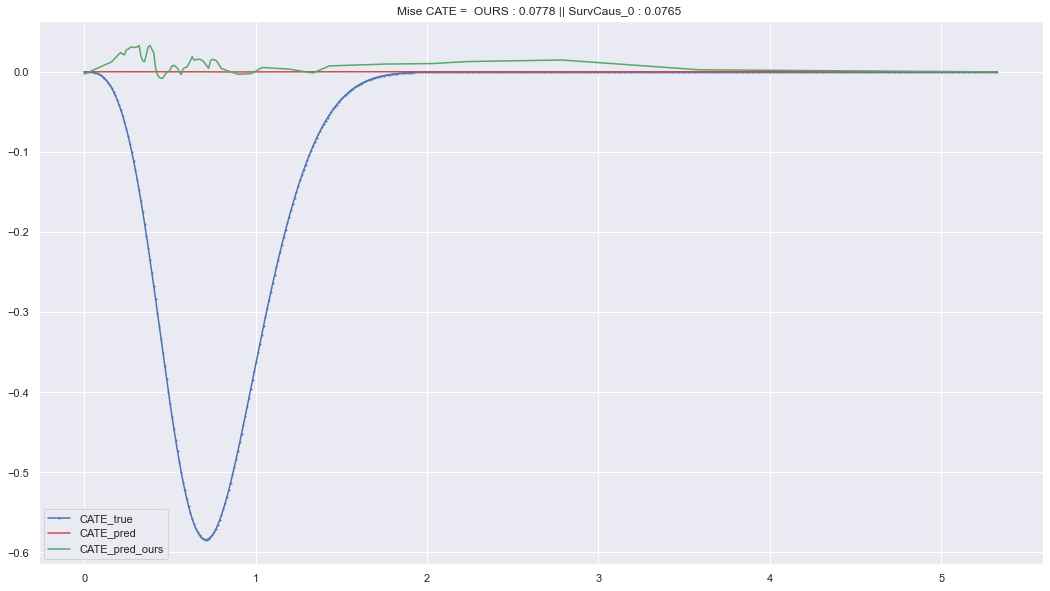

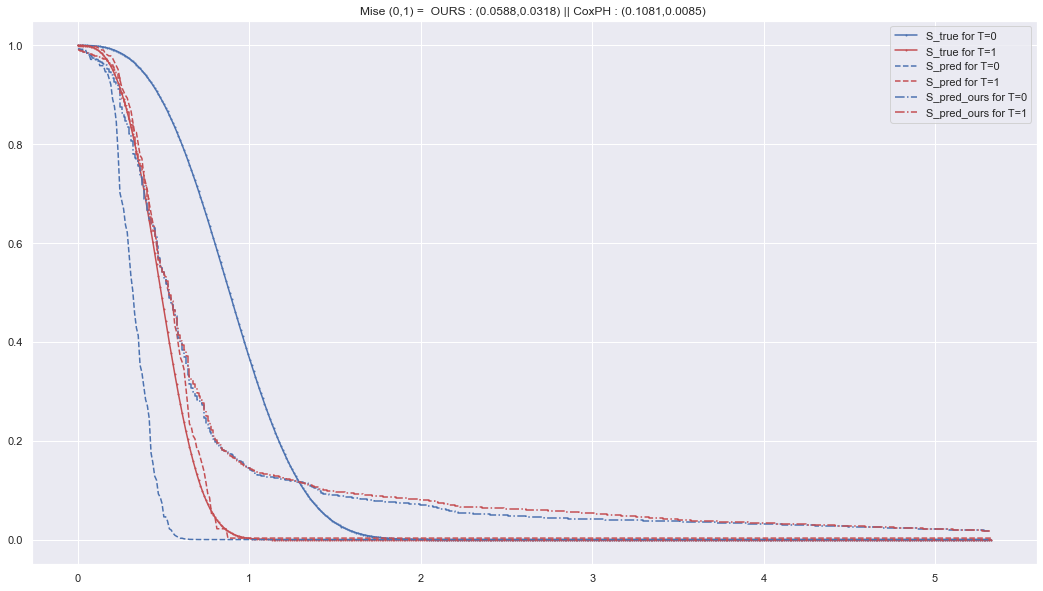

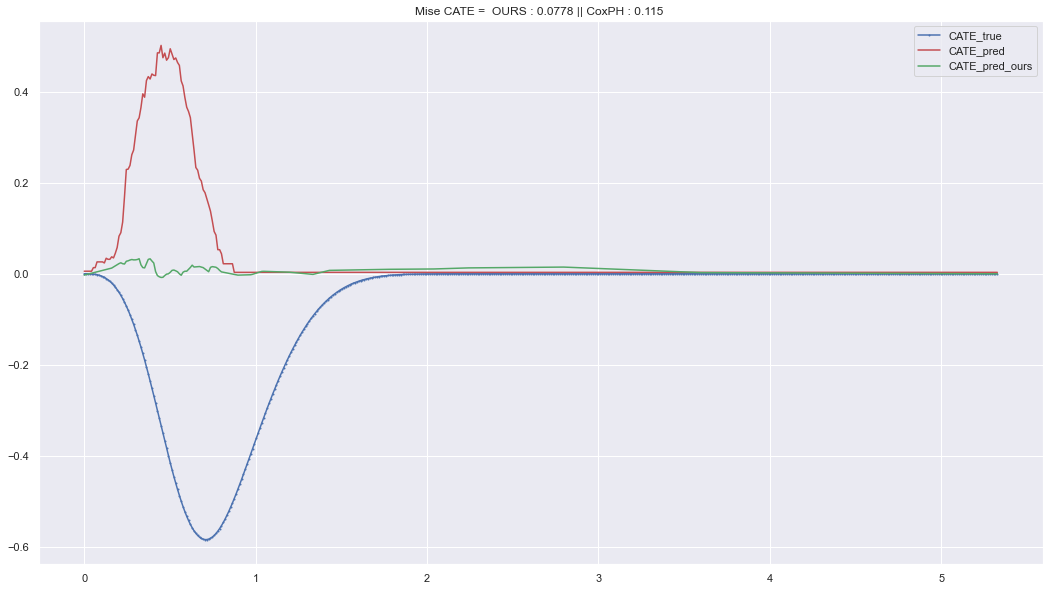

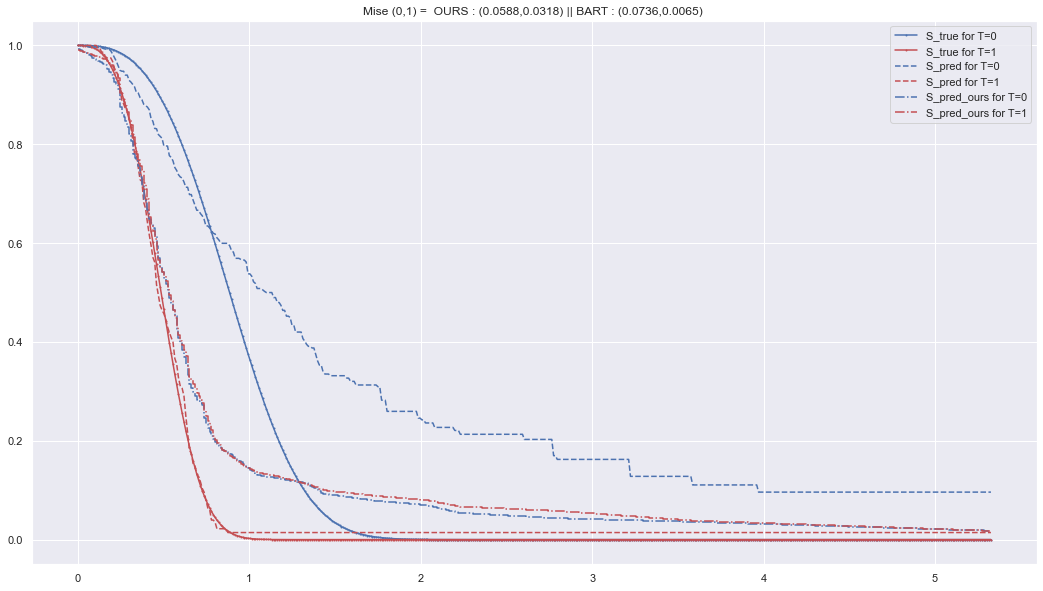

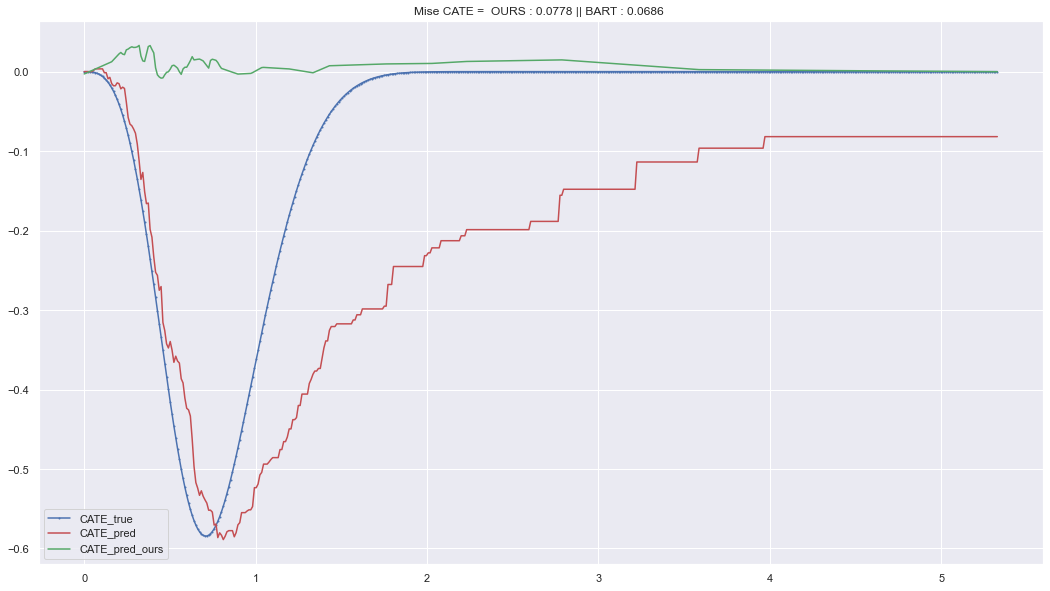

In [19]:

patient = 109
%matplotlib inline

for model_name in Ev.list_models[1:] :
    fig_surv,fig_cate = plots(patient, Ev.d_list_models, model_name)

